In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Load Complete Model

In [4]:
from prophet.serialize import model_to_json, model_from_json

with open('Complete_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

Importing plotly failed. Interactive plots will not work.


## Load processed Future Data

In [5]:
future_df = pd.read_csv('processed_future_data.csv')

In [6]:
future_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
future_df

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [8]:
future_df.rename(columns={'Date':'ds'}, inplace=True)

In [9]:
future_df

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [10]:
future_df['cap'] = 6000

## Make predictions on Future Data

In [11]:
predictions = saved_mv_model.predict(future_df)

In [12]:
predictions

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-13 00:00:00,5999.995768,6000,5855.977580,8032.891625,5999.989904,5999.998177,954.049081,954.049081,954.049081,...,-13.753607,-13.753607,-13.753607,468.502214,468.502214,468.502214,0.0,0.0,0.0,6954.044849
1,2022-06-13 00:15:00,5999.995769,6000,5798.730103,8093.101331,5999.989904,5999.998177,924.195014,924.195014,924.195014,...,-13.753607,-13.753607,-13.753607,469.233430,469.233430,469.233430,0.0,0.0,0.0,6924.190783
2,2022-06-13 00:30:00,5999.995769,6000,5851.415667,7906.633821,5999.989905,5999.998177,899.657664,899.657664,899.657664,...,-13.753607,-13.753607,-13.753607,469.964989,469.964989,469.964989,0.0,0.0,0.0,6899.653432
3,2022-06-13 00:45:00,5999.995769,6000,5872.254158,8073.943259,5999.989905,5999.998177,880.342447,880.342447,880.342447,...,-13.753607,-13.753607,-13.753607,470.696892,470.696892,470.696892,0.0,0.0,0.0,6880.338216
4,2022-06-13 01:00:00,5999.995769,6000,5719.046328,7923.165021,5999.989906,5999.998177,817.798433,817.798433,817.798433,...,-13.753607,-13.753607,-13.753607,471.429138,471.429138,471.429138,0.0,0.0,0.0,6817.794202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,5999.996158,6000,4796.701186,6932.143008,5999.990642,5999.998390,-86.856387,-86.856387,-86.856387,...,-145.664594,-145.664594,-145.664594,1535.165914,1535.165914,1535.165914,0.0,0.0,0.0,5913.139771
1341,2022-06-26 23:15:00,5999.996158,6000,4783.628451,6901.800590,5999.990642,5999.998390,-136.631595,-136.631595,-136.631595,...,-145.664594,-145.664594,-145.664594,1535.844780,1535.844780,1535.844780,0.0,0.0,0.0,5863.364563
1342,2022-06-26 23:30:00,5999.996158,6000,4815.017098,6914.161926,5999.990643,5999.998390,-182.037600,-182.037600,-182.037600,...,-145.664594,-145.664594,-145.664594,1536.523216,1536.523216,1536.523216,0.0,0.0,0.0,5817.958558
1343,2022-06-26 23:45:00,5999.996159,6000,4791.170972,6854.443349,5999.990643,5999.998390,-222.517226,-222.517226,-222.517226,...,-145.664594,-145.664594,-145.664594,1537.201224,1537.201224,1537.201224,0.0,0.0,0.0,5777.478932


In [14]:
future_predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [15]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,6954.044849,5855.977580,8032.891625
1,2022-06-13 00:15:00,6924.190783,5798.730103,8093.101331
2,2022-06-13 00:30:00,6899.653432,5851.415667,7906.633821
3,2022-06-13 00:45:00,6880.338216,5872.254158,8073.943259
4,2022-06-13 01:00:00,6817.794202,5719.046328,7923.165021
...,...,...,...,...
1340,2022-06-26 23:00:00,5913.139771,4796.701186,6932.143008
1341,2022-06-26 23:15:00,5863.364563,4783.628451,6901.800590
1342,2022-06-26 23:30:00,5817.958558,4815.017098,6914.161926
1343,2022-06-26 23:45:00,5777.478932,4791.170972,6854.443349


## Plot Predictions

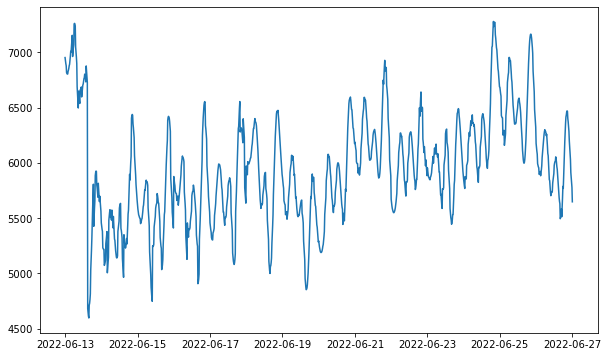

In [16]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])